In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

sns.set()

In [19]:
pd.set_option("display.max_columns", None)

In [20]:

public_train_df = pd.read_csv("../data/raw/public-train.csv")
public_train_df.head()

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor
0,709,0.7,0.2,16,12,7,3.8,0.24,2.3,0.28,1.4,0.20,3.1,0.17,4.7,0.19,2.2,0.21,0.186,0.5,0.147,1.5,0.089,1.6,1.5,2.6,-0.169,0.375
1,921,0.6,0.3,19,17,10,3.0,0.12,2.4,0.19,2.0,0.10,2.3,0.27,3.9,0.12,4.6,0.24,0.079,1.2,0.186,1.6,0.076,1.8,0.6,0.4,-0.075,0.234
2,177,0.8,0.4,14,12,5,3.2,0.17,1.8,0.18,2.5,0.24,1.8,0.28,4.4,0.24,3.9,0.28,0.036,1.4,0.048,0.7,0.073,0.6,2.7,0.3,-0.177,0.389
3,415,0.7,0.5,24,11,2,1.3,0.17,1.5,0.18,3.1,0.16,3.6,0.16,2.6,0.11,4.9,0.20,0.063,1.1,0.151,0.8,0.022,1.1,0.5,0.1,-0.102,0.358
4,802,0.8,0.4,21,10,3,4.4,0.15,2.6,0.13,2.2,0.28,1.4,0.26,4.3,0.24,2.4,0.24,0.044,1.9,0.123,1.9,0.046,1.1,2.0,0.6,-0.034,0.180


In [21]:
public_train_df.shape

(11940, 28)

In [22]:
public_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11940 entries, 0 to 11939
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n               11940 non-null  int64  
 1   p               11940 non-null  float64
 2   f               11940 non-null  float64
 3   x               11940 non-null  int64  
 4   y               11940 non-null  int64  
 5   z               11940 non-null  int64  
 6   a1              11940 non-null  float64
 7   a2              11940 non-null  float64
 8   a3              11940 non-null  float64
 9   a4              11940 non-null  float64
 10  b1              11940 non-null  float64
 11  b2              11940 non-null  float64
 12  b3              11940 non-null  float64
 13  b4              11940 non-null  float64
 14  c1              11940 non-null  float64
 15  c2              11940 non-null  float64
 16  c3              11940 non-null  float64
 17  c4              11940 non-null 

In [23]:
public_train_df.describe()

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor
count,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000,11940.000000
mean,548.845059,0.700687,0.350176,19.929564,19.972697,5.458124,3.008049,0.200654,2.989573,0.199744,3.006767,0.200666,2.993501,0.201355,3.005938,0.199647,3.013300,0.200454,0.100422,1.255310,0.100020,1.252814,0.049928,1.252152,1.547931,1.552647,-0.202591,0.362586
std,258.342510,0.122642,0.095939,6.077175,6.089534,2.874370,1.156649,0.057774,1.153929,0.058152,1.145294,0.057999,1.153200,0.058083,1.155266,0.058393,1.162371,0.058065,0.057729,0.435027,0.058071,0.435154,0.028666,0.434480,0.839320,0.845237,0.116617,0.115221
min,100.000000,0.500000,0.200000,10.000000,10.000000,1.000000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.100000,0.100000,-0.613000,-0.399000
25%,322.000000,0.600000,0.300000,15.000000,15.000000,3.000000,2.000000,0.150000,2.000000,0.150000,2.000000,0.150000,2.000000,0.150000,2.000000,0.150000,2.000000,0.150000,0.051000,0.900000,0.049000,0.900000,0.025000,0.900000,0.800000,0.800000,-0.284000,0.294000
50%,551.000000,0.700000,0.400000,20.000000,20.000000,5.000000,3.000000,0.200000,3.000000,0.200000,3.000000,0.200000,3.000000,0.200000,3.000000,0.200000,3.000000,0.200000,0.100000,1.300000,0.101000,1.300000,0.050000,1.300000,1.500000,1.600000,-0.205000,0.372000
75%,770.000000,0.800000,0.400000,25.000000,25.000000,8.000000,4.000000,0.250000,4.000000,0.250000,4.000000,0.250000,4.000000,0.250000,4.000000,0.250000,4.000000,0.250000,0.151000,1.600000,0.151000,1.600000,0.075000,1.600000,2.300000,2.300000,-0.122000,0.443000
max,1000.000000,0.900000,0.500000,30.000000,30.000000,10.000000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,5.000000,0.300000,0.200000,2.000000,0.200000,2.000000,0.100000,2.000000,3.000000,3.000000,0.266000,0.717000


In [24]:
public_train_df.iloc[0, :]

n                 709.000
p                   0.700
f                   0.200
x                  16.000
y                  12.000
z                   7.000
a1                  3.800
a2                  0.240
a3                  2.300
a4                  0.280
b1                  1.400
b2                  0.200
b3                  3.100
b4                  0.170
c1                  4.700
c2                  0.190
c3                  2.200
c4                  0.210
g1                  0.186
g2                  0.500
l1                  0.147
l2                  1.500
l3                  0.089
l4                  1.600
e1                  1.500
e2                  2.600
cent_price_cor     -0.169
cent_trans_cor      0.375
Name: 0, dtype: float64

<AxesSubplot:>

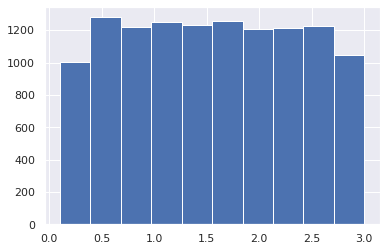

In [46]:
public_train_df["e1"].hist()

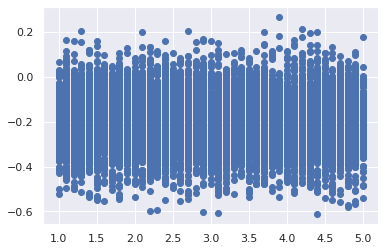

In [57]:
plt.scatter(public_train_df["a1"], public_train_df["cent_price_cor"])

In [58]:
teste = public_train_df.loc[public_train_df["a1"] == 1]
teste.head()

,n,p,f,x,y,z,a1,a2,a3,a4,b1,b2,b3,b4,c1,c2,c3,c4,g1,g2,l1,l2,l3,l4,e1,e2,cent_price_cor,cent_trans_cor
44,724,0.7,0.2,23,16,6,1.0,0.23,1.1,0.25,2.5,0.23,2.3,0.28,1.9,0.20,4.8,0.11,0.161,1.4,0.063,1.2,0.017,1.3,1.2,1.7,-0.070,0.229
56,318,0.8,0.4,28,27,6,1.0,0.25,4.5,0.16,4.7,0.22,2.1,0.13,1.3,0.29,4.2,0.15,0.008,0.8,0.015,0.7,0.092,1.1,1.0,1.4,-0.178,0.314
120,638,0.7,0.5,20,20,2,1.0,0.26,2.5,0.11,1.1,0.29,4.0,0.28,2.1,0.13,4.4,0.21,0.194,1.7,0.127,2.0,0.086,0.6,1.2,2.3,-0.079,0.389
223,558,0.8,0.4,22,19,4,1.0,0.21,4.6,0.19,2.5,0.28,1.6,0.24,1.3,0.27,2.2,0.30,0.090,1.1,0.164,0.5,0.046,0.7,0.1,0.8,-0.206,0.374
381,738,0.6,0.4,16,17,10,1.0,0.16,2.6,0.17,1.3,0.24,2.0,0.29,3.3,0.16,4.7,0.19,0.114,0.8,0.090,1.9,0.010,0.6,1.8,0.2,0.007,0.053


<AxesSubplot:>

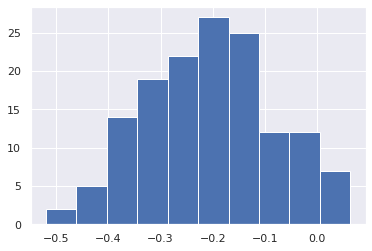

In [59]:
teste["cent_price_cor"].hist()

3.8


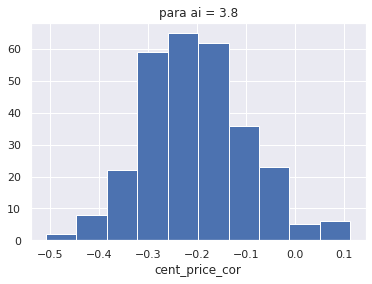

3.0


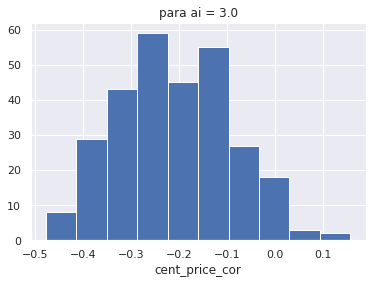

3.2


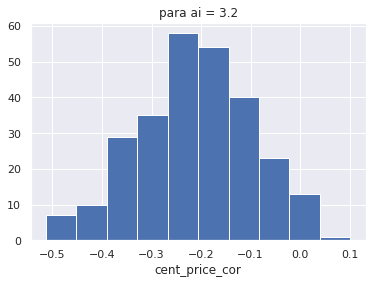

1.3


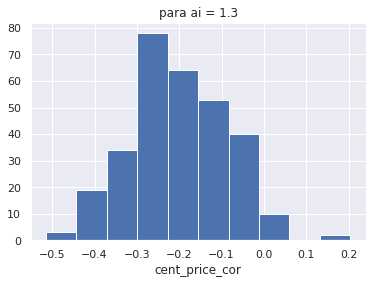

4.4


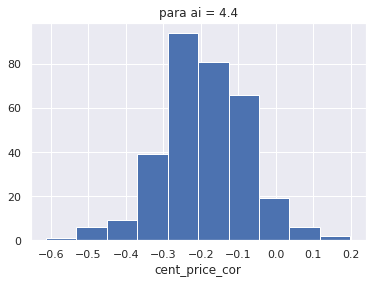

3.7


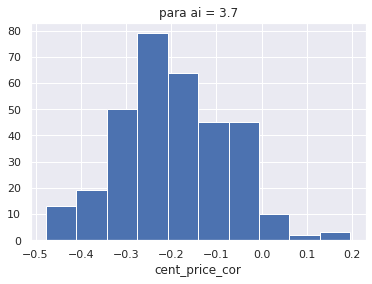

3.3


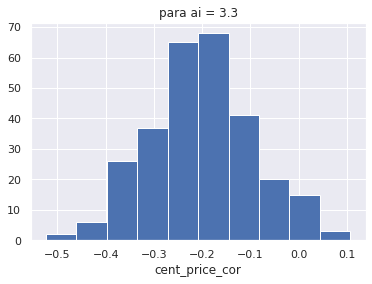

1.1


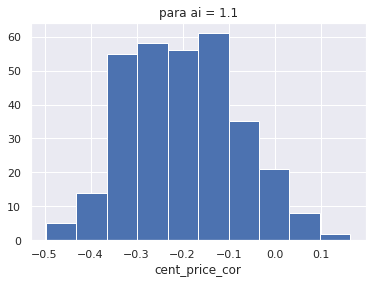

4.7


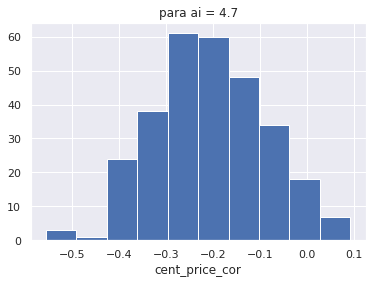

2.8


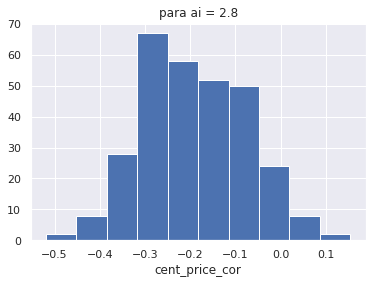

3.9


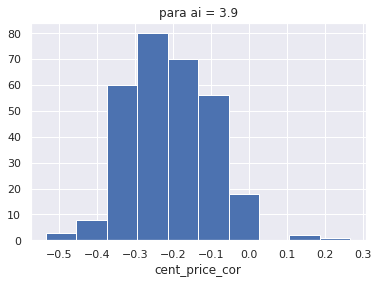

1.6


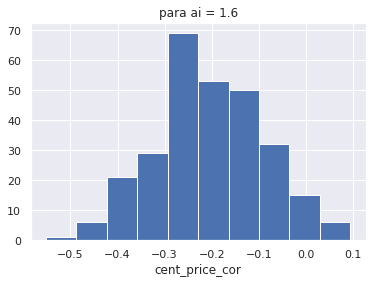

3.5


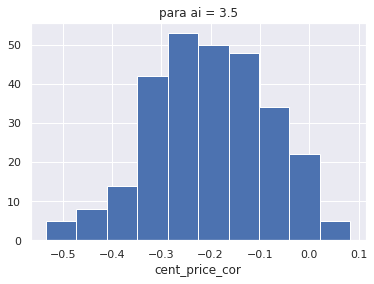

2.0


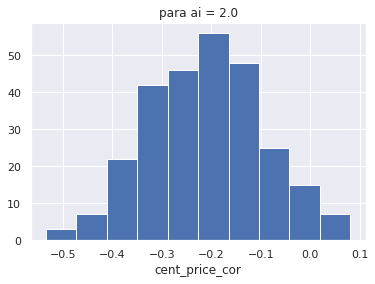

1.7


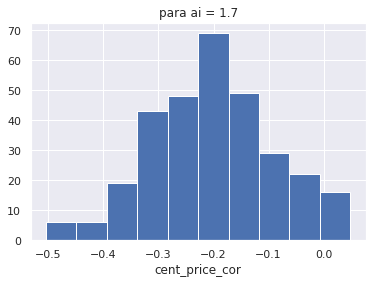

4.8


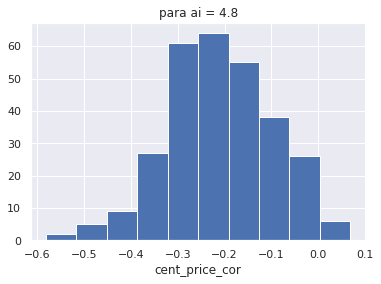

1.5


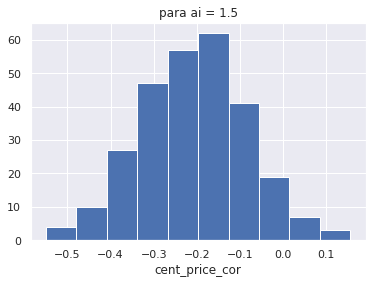

2.6


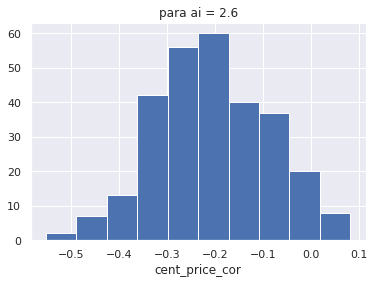

2.7


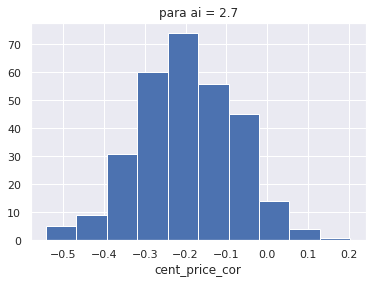

3.4


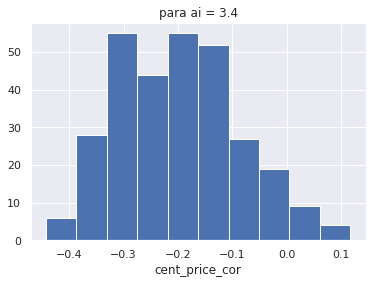

2.5


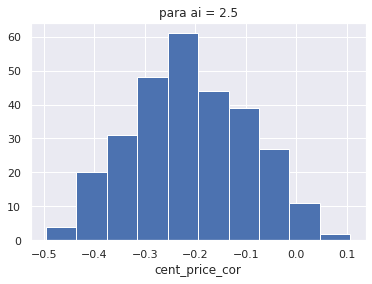

4.9


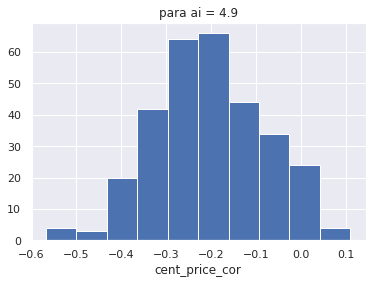

2.3


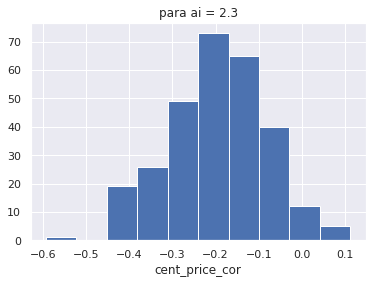

2.1


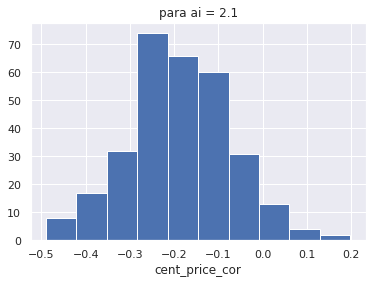

1.0


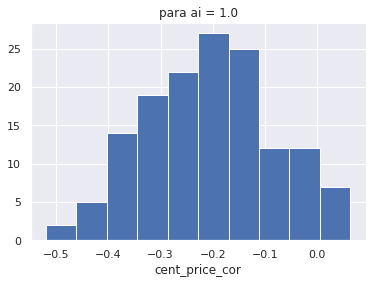

4.2


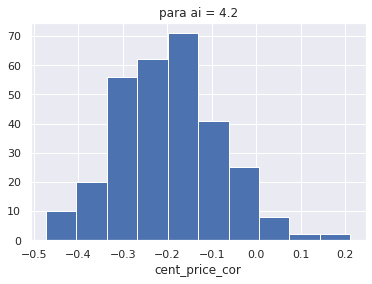

4.6


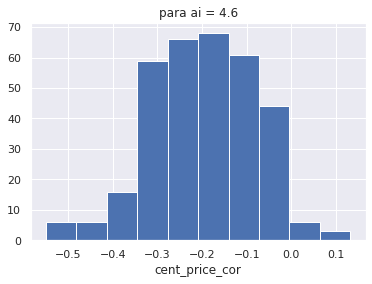

4.5


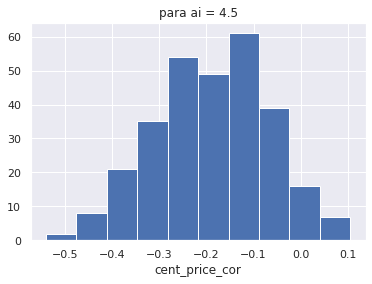

2.4


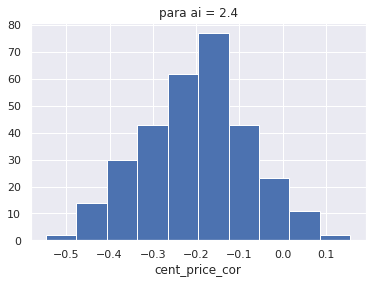

3.6


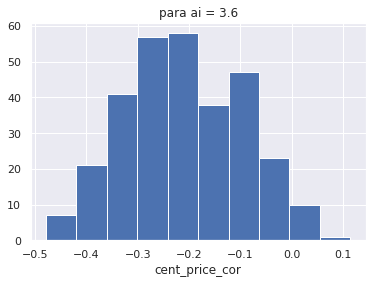

1.8


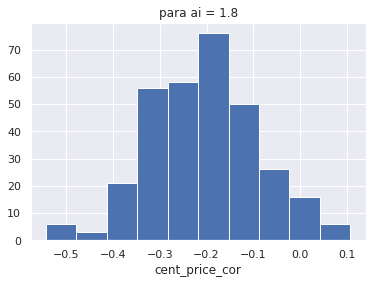

4.3


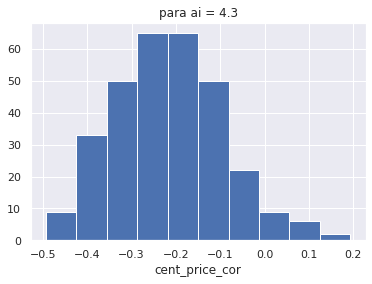

2.9


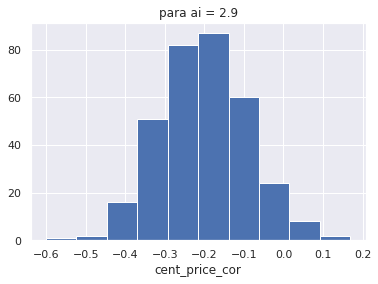

4.0


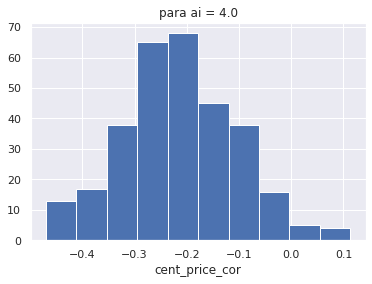

2.2


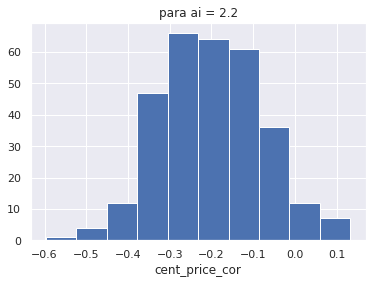

1.9


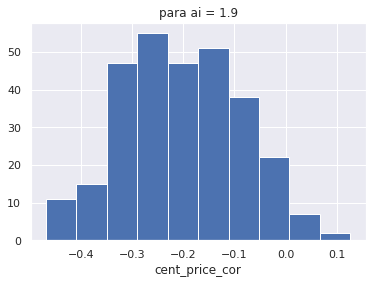

1.4


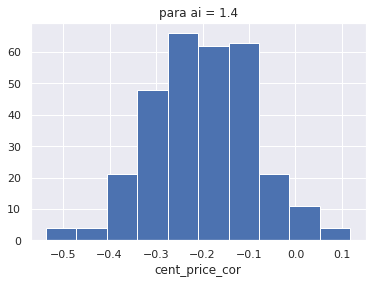

3.1


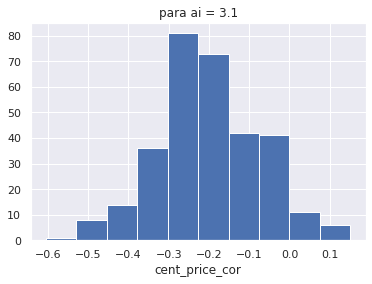

4.1


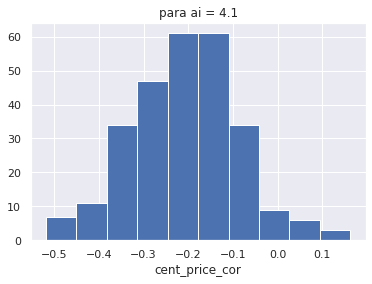

1.2


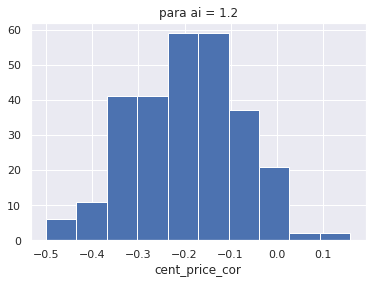

5.0


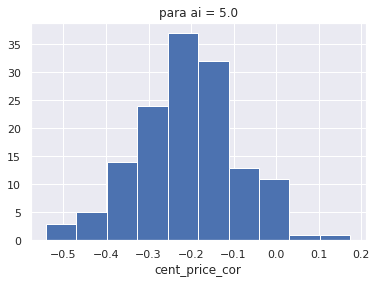

In [64]:
for ai in public_train_df["a1"].unique():
    print(ai)
    plt.title("para ai = {}".format(ai))
    teste = public_train_df.loc[public_train_df["a1"] == ai]
    teste["cent_price_cor"].hist()
    plt.xlabel("cent_price_cor")
    plt.show()

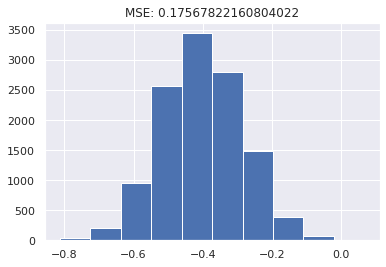

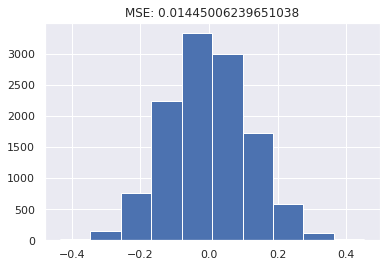

In [93]:
from skimage.metrics import mean_squared_error

n = public_train_df["cent_price_cor"].shape[0]

my_guess = 0.2
y_real = public_train_df["cent_price_cor"]
y_guessed = np.array([my_guess]*n)
y_random = np.random.uniform(-0.15, -0.25, n)
plt.title("MSE: {}".format(mean_squared_error(y_real, y_guessed)))
plt.hist(public_train_df["cent_price_cor"] - y_guessed)
plt.show()
plt.title("MSE: {}".format(mean_squared_error(y_real, y_random)))
plt.hist(public_train_df["cent_price_cor"] - y_random)
plt.show()

<AxesSubplot:>

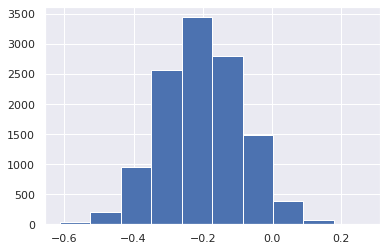

In [94]:
public_train_df["cent_price_cor"].hist()

<AxesSubplot:>

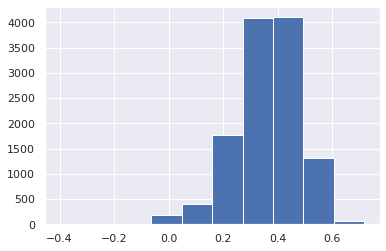

In [95]:
public_train_df["cent_trans_cor"].hist()